In [1]:
# Importing necessary libraries
import os
import string
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats
# total libraries we will need for out whole dataset

DOWNLOADING THE DATASET

In [2]:
# Downloading the bank marketing dataset from a publicly available source.
!wget 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

# Extracting the downloaded ZIP file to access the dataset.
!unzip bank+marketing.zip

# extracting the main dataset
!unzip bank-additional.zip

--2023-10-03 19:41:10--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  2.58MB/s    in 0.4s    

2023-10-03 19:41:11 (2.58 MB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-addit

LOADING THE DATASET

In [3]:
# Defining the file path to the bank marketing dataset.
csv_path = '/content/bank-additional/bank-additional-full.csv'

# Loading the dataset into a DataFrame using pandas.
# - 'header=0' specifies that the first row contains column headers.
# - 'sep=;' specifies that the dataset is separated by semicolons.
df = pd.read_csv(csv_path, header=0, sep=';')

# Printing the first 5 rows of the DataFrame to inspect the data.
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

MISSING VALUE CHECK

In [4]:
# Checking for missing values in the DataFrame.
# The 'isnull()' function returns a DataFrame of the same shape as 'df' with 'True' where there are missing values.
# 'sum()' then counts the 'True' values for each column, indicating the number of missing values.
missing_values = df.isnull().sum()

# Printing the number of missing values in each column of the DataFrame.
print(missing_values)
# Printing the shape of the DataFrame to show the number of rows and columns.
# This provides information about the dataset's dimensions.
print("DF Shape : ", df.shape)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
DF Shape :  (41188, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: >

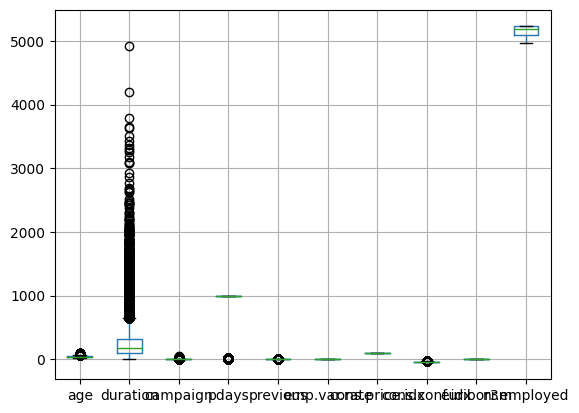

In [5]:
# Displaying information about the DataFrame.
# 'df.info()' provides an overview of the dataset, including column names, data types, and non-null counts.
df.info()

# Creating a boxplot to visualize the distribution of numeric columns.
# 'df.boxplot()' generates boxplots for all numeric columns in the DataFrame.
# This can help identify outliers and the spread of data.
df.boxplot()

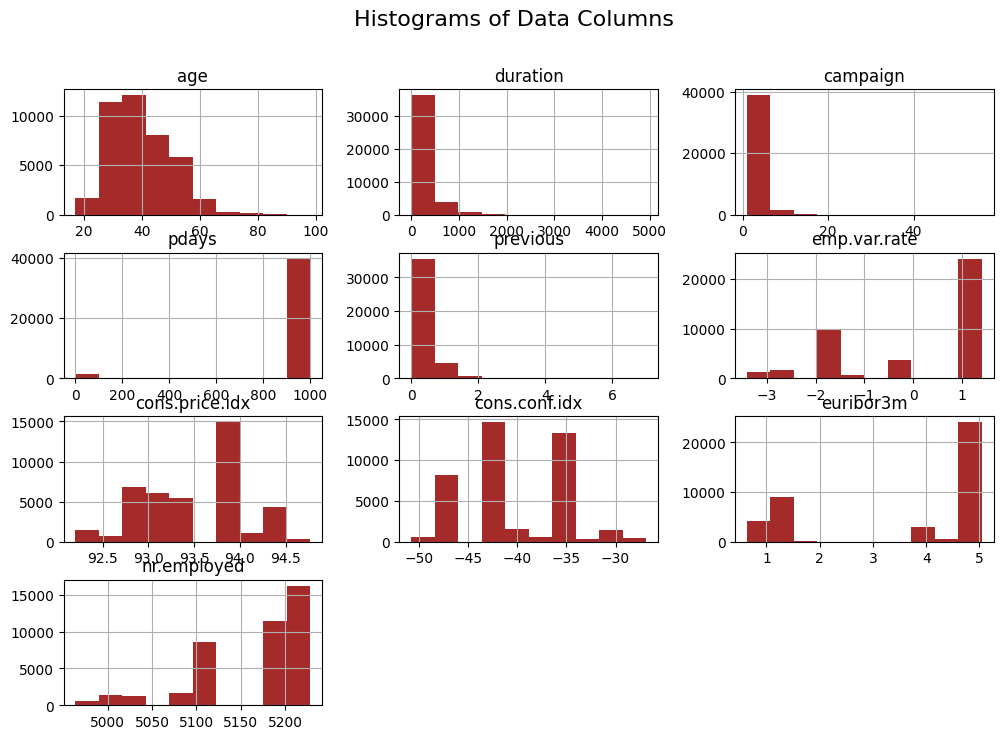

In [6]:
# Importing the necessary libraries
import matplotlib.pyplot as plt

# Setting the color to brown (you can use any color you prefer)
hist_color = 'brown'

# Creating histograms for all columns in the DataFrame
# Adjust the 'figsize' parameter to set the size of the plot
df.hist(figsize=(12, 8), color=hist_color)

# Adding titles to the subplots (optional)
plt.suptitle('Histograms of Data Columns', fontsize=16)

# Display the histograms
plt.show()


ANALYSING OUTLIERS AND REMOVING THEM

In [7]:
#as we can see the most outliers lies in age,balance and duration we need to fix them so
# Initialize a variable to keep track of the column count
i = 0

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is not of object type (i.e., numeric)
    if df[column].dtypes != 'object':
        # Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds to detect outliers
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Count the number of outliers above the upper bound and below the lower bound
        lengthU = len(df[column][df[column] > upper])
        lengthL = len(df[column][df[column] < lower])

        # Print the total number of outliers detected for the current column
        print(f"Total outliers in {column} for upper bound: {lengthU} and for lower bound: {lengthL}")

        # Replace outliers with the upper and lower bounds
        df[column] = np.where(df[column] > upper, upper, df[column])
        df[column] = np.where(df[column] < lower, lower, df[column])


Total outliers in age for upper bound: 469 and for lower bound: 0
Total outliers in duration for upper bound: 2963 and for lower bound: 0
Total outliers in campaign for upper bound: 2406 and for lower bound: 0
Total outliers in pdays for upper bound: 0 and for lower bound: 1515
Total outliers in previous for upper bound: 5625 and for lower bound: 0
Total outliers in emp.var.rate for upper bound: 0 and for lower bound: 0
Total outliers in cons.price.idx for upper bound: 0 and for lower bound: 0
Total outliers in cons.conf.idx for upper bound: 447 and for lower bound: 0
Total outliers in euribor3m for upper bound: 0 and for lower bound: 0
Total outliers in nr.employed for upper bound: 0 and for lower bound: 0


In [8]:
# Get the numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Separate features (X) and the target variable (y)
X = df.drop('y', axis=1)
y = df['y']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object to the numeric columns
scaler.fit(df[numeric_columns])

# Transform (scale) the numeric columns using the MinMaxScaler object
df[numeric_columns] = scaler.transform(df[numeric_columns])

#label encoding to better use those categorical columns into our model

In [9]:
# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# Loop through the columns in the DataFrame
for column in df.columns:
    # Check if the column data type is 'object' (indicating a categorical column)
    if df[column].dtype == 'object':
        # Create a LabelEncoder object
        le = LabelEncoder()

        # Perform label encoding on the column and replace it with encoded values
        df[column] = le.fit_transform(df[column])

        # Store the label encoder and its mapping in the dictionary
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the first few rows of the DataFrame after label encoding
df.head()
#label encoding to better use those categorical columns into our model

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.742857,3,1,0,0,0,0,1,6,1,...,0.0,0.0,0.0,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
1,0.761905,7,1,3,1,0,0,1,6,1,...,0.0,0.0,0.0,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
2,0.380952,7,1,3,0,2,0,1,6,1,...,0.0,0.0,0.0,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
3,0.438095,0,1,1,0,0,0,1,6,1,...,0.0,0.0,0.0,1,0.9375,0.698753,0.603774,0.957379,0.859735,0
4,0.742857,7,1,3,0,0,2,1,6,1,...,0.0,0.0,0.0,1,0.9375,0.698753,0.603774,0.957379,0.859735,0


QUESTIONS TO ANSWERED
1. What is the distribution of the customer ages?

Ans- In below code cell

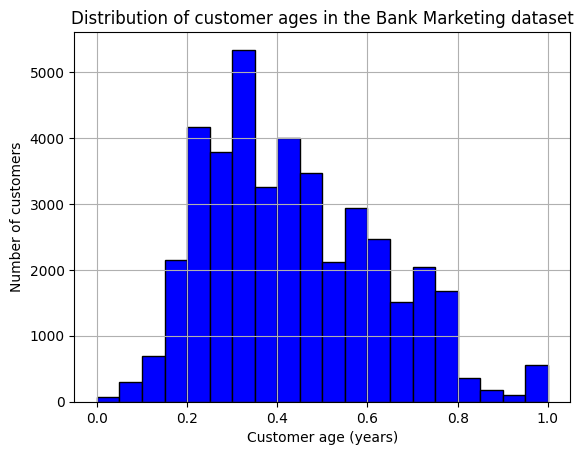

In [10]:
# Get the customer ages from the 'age' column in the DataFrame
customer_ages = df['age']

# Create a histogram of customer ages using Matplotlib
plt.hist(customer_ages, bins=20, color='blue', edgecolor='black')  # Customize bins, color, and edgecolor
plt.xlabel('Customer age (years)')
plt.ylabel('Number of customers')
plt.title('Distribution of customer ages in the Bank Marketing dataset')
plt.grid(True)  # Add grid lines to the plot (optional)

# Display the histogram plot
plt.show()
# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = df.corr()

# Convert the 'y' column to a string data type (assuming it was numeric)
df['y'] = df['y'].astype(str)


#2. What is the relationship between customer age and subscription?

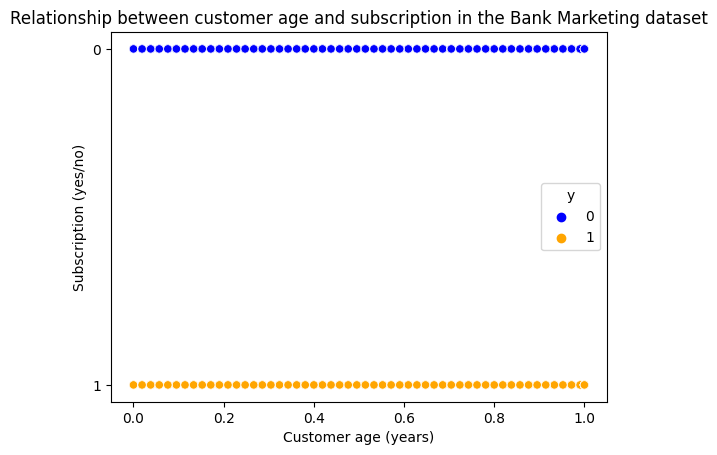

In [11]:
# Create a scatterplot using Seaborn
sns.scatterplot(
    x='age',               # X-axis: Customer age
    y='y',                 # Y-axis: Subscription (yes/no)
    hue='y',               # Hue (color) based on the 'y' column (subscription)
    data=df,
    palette=['blue', 'orange'],  # Define colors for 'yes' and 'no' subscriptions
)

# Add labels and title to the plot
plt.xlabel('Customer age (years)')
plt.ylabel('Subscription (yes/no)')
plt.title('Relationship between customer age and subscription in the Bank Marketing dataset')

# Show the plot
plt.show()

#3.Are there any other factors that are correlated with subscription?

In [12]:
correlation_matrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.001493,-0.393795,-0.114885,0.171211,-0.002246,-0.007795,0.012151,-0.026998,-0.019215,...,0.003293,NaN,NaN,0.018387,0.012206,0.006770,0.126848,0.024068,-0.002347,0.020941
job,-0.001493,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.006754,NaN,NaN,0.011504,-0.008271,-0.016017,0.052758,-0.007880,-0.019574,0.025122
marital,-0.393795,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.010592,NaN,NaN,0.001912,-0.084210,-0.057477,-0.033808,-0.091939,-0.086199,0.046203
education,-0.114885,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,0.002378,NaN,NaN,0.017009,-0.043778,-0.081607,0.078817,-0.036380,-0.041492,0.057799
default,0.171211,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.037034,NaN,NaN,0.023417,0.203263,0.168073,0.026583,0.195336,0.189845,-0.099352
housing,-0.002246,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.010762,NaN,NaN,-0.011783,-0.060196,-0.080504,-0.033858,-0.059277,-0.045862,0.011552
loan,-0.007795,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.011721,NaN,NaN,-0.001511,0.001849,-0.002430,-0.012019,0.000125,0.003903,-0.004909
contact,0.012151,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.071604,NaN,NaN,0.118744,0.393584,0.591474,0.251758,0.399773,0.269155,-0.144773
month,-0.026998,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.063699,NaN,NaN,-0.065012,-0.178782,-0.004239,0.009464,-0.117264,-0.221425,-0.006065
day_of_week,-0.019215,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.051073,NaN,NaN,0.018732,0.033245,0.005644,0.041472,0.039043,0.028380,0.015967


MODEL BUILDING AND EVALUATION (ALL MODELS IN SEQUENCE)

#4.What is the accuracy of the logistic regression model?
#6. What is the precision of the logistic regression model?
#7. What is the recall of the logistic regression model?
#8. What is the f1-score of the logistic regression model?
can check below

In [13]:
# Initialize a Logistic Regression classifier
clf = LogisticRegression(max_iter=100000)

# Columns to drop from the feature set
to_drop = ['y', 'age', 'previous', 'campaign','pdays']

# Create feature matrix X by dropping specified columns
X = df.drop(to_drop, axis=1)

# Target variable y
y = df['y']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Determine the unique labels in the target variable
unique_labels = set(y_test)
print(unique_labels)

# Calculate precision and recall for the positive class ('1')
precision = precision_score(y_test, y_pred, pos_label='1')
recall = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='0')
# Print model evaluation metrics
print('Training accuracy:', clf.score(X_train, y_train))  # Print training accuracy
print('Testing accuracy:', clf.score(X_test, y_test))  # Print testing accuracy
print("Precision:", precision)  # Print precision score
print("Recall:", recall)  # Print recall score
print("F1 Score:",f1)

{'0', '1'}
Training accuracy: 0.9070713201820941
Testing accuracy: 0.9078659868900218
Precision: 0.6705426356589147
Recall: 0.3700534759358289
F1 Score: 0.9494841930116473


#5. What are the most important features for the logistic regression model?

In [14]:
# Get the coefficients and feature names
coefficients = clf.coef_[0]
feature_names = X.columns

# Create a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value in descending order
sorted_coefficients = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top N most important features
top_n = 10  # You can adjust this number to show the top N features
print(sorted_coefficients.head(top_n))

           Feature  Coefficient
9         duration     4.993063
11    emp.var.rate    -4.493203
15     nr.employed    -3.020508
12  cons.price.idx     2.454733
14       euribor3m     2.168309
13   cons.conf.idx     1.113532
10        poutcome     0.892621
6          contact    -0.834570
3          default    -0.348483
7            month    -0.106571


In [ ]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a K-Nearest Neighbors Classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Fit the best model to the training data
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_knn_classifier.predict(X_test)

# Calculate accuracy, precision, and recall on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='1')
recall = recall_score(y_test, y_pred, pos_label='1')

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Create a GridSearchCV instance with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a Decision Tree Classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)

# Fit the best model to the training data
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy, precision, and recall on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='1')
recall = recall_score(y_test, y_pred, pos_label='1')

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=1)

# Define a grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [20, 40, 50, 60]
}

# Create a GridSearchCV instance with the classifier and hyperparameter grid
gs_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=2)

# Perform nested cross-validation combining grid search (inner loop) and k-fold CV (outer loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with grid search to the training data and find the best hyperparameters
gs_rf.fit(X_train, y_train)

# Get the best estimator from grid search
gs_rf_best = gs_rf.best_estimator_

# Fit the best estimator to the training data
gs_rf_best.fit(X_train, y_train)

# Print training accuracy, cross-validation mean accuracy, and test accuracy
print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train) * 100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores) * 100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_test) * 100))

# Calculate precision and recall on the test data
y_pred = gs_rf_best.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label='1')
recall = recall_score(y_test, y_pred, pos_label='1')
print("Precision:", precision)
print("Recall:", recall)

#Q9.How can you improve the performance of the logistic regression model?
#Ans-We used data preprocessing to remove null values deal with outliers, feature engineering to figure out which categories really matter with our outcome if not we dropped them as you can check above in logistic regression model,than comes hyperparameters we applied all the hyperparameters and sorted the best out of result than comes overfitting we tried out best to avoid the same rest is all about dataset if the dataset is good for logistic regression it will provide good scores or else we will need to change the model.

Q10. What are the limitations of the logistic regression model?
Ans- Logistic regression is a widely used classification algorithm with many advantages, but it also has certain limitations. Here are some of the limitations of logistic regression:

Assumption of Linearity: Logistic regression assumes that the relationship between the independent variables and the log-odds of the dependent variable is linear. If the relationship is highly non-linear, logistic regression may not perform well.

Binary Output: Logistic regression is designed for binary classification problems where the dependent variable has two classes. Extending it to multi-class classification can be done but requires additional techniques like one-vs-all (OvA) or softmax regression.

Limited Expressiveness: Logistic regression may not capture complex relationships in the data as effectively as more flexible models like decision trees or neural networks.

High Sensitivity to Outliers: Logistic regression can be sensitive to outliers, which can have a significant impact on the model's coefficients and predictions.

Assumption of Independence: It assumes that the independent variables are independent of each other. If there is multicollinearity (high correlation) among predictors, it can lead to unstable coefficient estimates.

Linear Decision Boundary: Logistic regression models produce linear decision boundaries. In cases where the decision boundary is non-linear, logistic regression may not fit the data well.

Limited Handling of Imbalanced Data: Logistic regression may not perform well with imbalanced datasets, where one class significantly outnumbers the other. Special techniques like resampling or changing class weights may be needed.

No Feature Importance: Logistic regression does not provide inherent feature importance scores. While coefficients can indicate direction and strength of relationships, they don't represent feature importance like decision tree-based models.

Limited Handling of Missing Data: Logistic regression requires complete data. Handling missing data can be challenging, and simple imputation methods may introduce bias.

Not Suitable for Non-Linear Data: When the relationship between predictors and the response variable is highly non-linear, logistic regression may not capture the underlying patterns effectively.

Limited to Classification: Logistic regression is specifically designed for classification tasks and may not be suitable for regression problems.

Prone to Overfitting: Without regularization, logistic regression can be prone to overfitting when dealing with high-dimensional data or a large number of features.

Lack of Robustness: Logistic regression may not perform well in situations where model assumptions are violated or when the data is noisy.

Despite these limitations, logistic regression remains a valuable tool for many classification problems, especially when the assumptions are met and the relationship between features and the target variable is approximately linear. Understanding these limitations can help in selecting the appropriate model for a given problem and considering potential challenges in data analysis.